In [1]:
# importing basic necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

###### Loading the datasets

In [2]:
#Load the dataset using Pandas.
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_stores = pd.read_csv('stores.csv')
df_oil = pd.read_csv('oil.csv')
df_holidays = pd.read_csv('holidays_events.csv')

###### Analysing and cleaning the loaded datasets

In [3]:
# Get first 5 rows of train dataset
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
# Summary of train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [5]:
# Check the null values in train dataset
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [6]:
# Check the duplicate values in train dataset
df_train.duplicated().sum()

0

In [7]:
# Get first 5 rows of test dataset
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [8]:
# Summary of test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [10]:
# Check for duplicates in test dataset
df_test.duplicated().sum()

0

In [11]:
# Get first 5 rows of test dataset
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [12]:
# Summary of oil dataset
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [13]:
# Check the null values in train dataset
df_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [16]:
#- Handle missing values in oil prices by filling gaps with interpolation.
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].interpolate(method = 'linear')

In [17]:
# Recheck the missing values after interpolation
df_oil.isnull().sum()

date          0
dcoilwtico    1
dtype: int64

In [18]:
# Drop the remaining null values after interpolation
df_oil = df_oil.dropna()

In [20]:
# Check for duplicate values in oil dataset
df_oil.duplicated().sum()

0

In [21]:
# Get first 5 rows of stores dataset
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [22]:
# Get a quick summary of store dataset
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [24]:
# Check for duplicates in store dataset
df_stores.duplicated().sum()

0

In [25]:
# Get first 5 rows of holidays dataset
df_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [26]:
# Get a quick summary of store dataset
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [27]:
# Check for duplicates in holidays dataset
df_holidays.duplicated().sum()

0

###### I found the missing values in oil dataset, so as per the instruction I have handled those values with 'interpolation' method.There were no null values or duplicate records observed in other datasets. 

In [28]:
# Convert date columns to proper datetime formats.
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

###### Converted date columns of the datasets from 'object' to 'datetime' 

In [29]:
 #Merge data from stores.csv, oil.csv, and holidays_events.csv into the main dataset.
    # Here 'train' & 'test' both are main datasets

In [30]:
df_train = df_train.merge(df_oil, on = 'date', how = 'left')
df_test = df_test.merge(df_oil, on = 'date', how = 'left')

In [31]:
df_train = df_train.merge(df_holidays, on = 'date', how = 'left')
df_test = df_test.merge(df_holidays, on = 'date', how = 'left')

In [32]:
df_train = df_train.merge(df_stores, on = 'store_nbr', how = 'left')
df_test= df_test.merge(df_stores, on = 'store_nbr', how = 'left')

In [34]:
# Examined the null values after the merge in train dataset
df_train.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
dcoilwtico      880308
type_x         2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
city                 0
state                0
type_y               0
cluster              0
dtype: int64

In [35]:
# Drop the null values in train dataset
df_train = df_train.dropna()

In [36]:
# Examined the null values after the merge in test dataset
df_test.isnull().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
dcoilwtico      7128
type_x         26730
locale         26730
locale_name    26730
description    26730
transferred    26730
city               0
state              0
type_y             0
cluster            0
dtype: int64

In [37]:
# Drop the null values in test dataset
df_test = df_test.dropna()

###### 2. Feature Engineering- Time-based Features:
  - Extract day, week, month, year, and day of the week.
  - Identify seasonal trends (e.g., are sales higher in December?).

In [39]:
#Extract day, week, month, year, and day of the week in train dataset
df_train['day'] = df_train['date'].dt.day
df_train['week'] = df_train['date'].dt.isocalendar().week
df_train['month'] = df_train['date'].dt.month
df_train['year'] = df_train['date'].dt.year
df_train['weekday'] = df_train['date'].dt.weekday

In [40]:
#Extract day, week, month, year, and day of the week in test dataset
df_test['day'] = df_test['date'].dt.day
df_test['week'] = df_test['date'].dt.isocalendar().week
df_test['month'] = df_test['date'].dt.month
df_test['year'] = df_test['date'].dt.year
df_test['weekday'] = df_test['date'].dt.weekday

In [41]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,...,transferred,city,state,type_y,cluster,day,week,month,year,weekday
73062,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,97.01,Holiday,National,Ecuador,...,False,Quito,Pichincha,D,13,11,7,2,2013,0
73063,73063,2013-02-11,1,BABY CARE,0.0,0,97.01,Holiday,National,Ecuador,...,False,Quito,Pichincha,D,13,11,7,2,2013,0
73064,73064,2013-02-11,1,BEAUTY,0.0,0,97.01,Holiday,National,Ecuador,...,False,Quito,Pichincha,D,13,11,7,2,2013,0
73065,73065,2013-02-11,1,BEVERAGES,172.0,0,97.01,Holiday,National,Ecuador,...,False,Quito,Pichincha,D,13,11,7,2,2013,0
73066,73066,2013-02-11,1,BOOKS,0.0,0,97.01,Holiday,National,Ecuador,...,False,Quito,Pichincha,D,13,11,7,2,2013,0


In [42]:
#Identify seasonal trends (e.g., are sales higher in December?).

monthly_sales_trend = df_train.groupby('month')['sales'].mean()

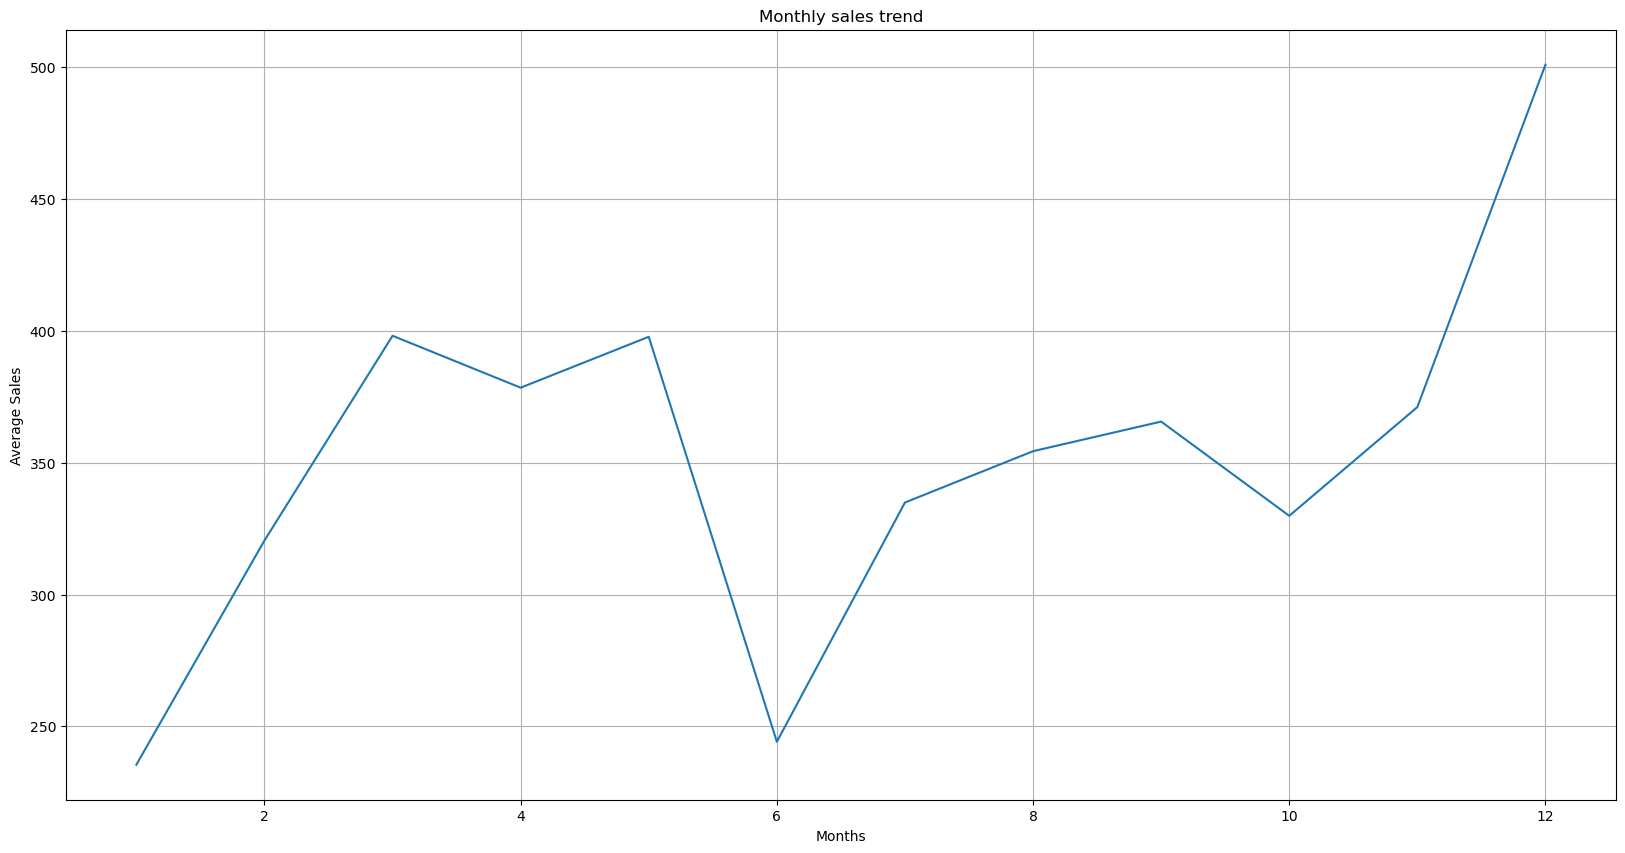

In [43]:
# Visualization of the monthly trend
plt.figure(figsize = (20,10))
plt.plot(monthly_sales_trend)
plt.xlabel('Months')
plt.ylabel('Average Sales')
plt.title('Monthly sales trend')
plt.grid()
plt.show()

###### The graph shows that the month 12(december) shows highest sales and 6(june) is the lowest.

 Event-based Features:
  - Create binary flags for holidays, promotions, and economic events.
  - Identify if a day is a government payday (15th and last day of the month).
  - Consider earthquake impact (April 16, 2016) as a separate feature.

In [46]:
# Create binary flags for holidays, promotions, and economic events.

In [45]:
df_train['isweekoff'] = df_train['weekday'].isin([5,6]).astype(int)

In [47]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,...,city,state,type_y,cluster,day,week,month,year,weekday,isweekoff
73062,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,97.01,Holiday,National,Ecuador,...,Quito,Pichincha,D,13,11,7,2,2013,0,0
73063,73063,2013-02-11,1,BABY CARE,0.0,0,97.01,Holiday,National,Ecuador,...,Quito,Pichincha,D,13,11,7,2,2013,0,0
73064,73064,2013-02-11,1,BEAUTY,0.0,0,97.01,Holiday,National,Ecuador,...,Quito,Pichincha,D,13,11,7,2,2013,0,0
73065,73065,2013-02-11,1,BEVERAGES,172.0,0,97.01,Holiday,National,Ecuador,...,Quito,Pichincha,D,13,11,7,2,2013,0,0
73066,73066,2013-02-11,1,BOOKS,0.0,0,97.01,Holiday,National,Ecuador,...,Quito,Pichincha,D,13,11,7,2,2013,0,0


###### I think the last 2 queries are irrelavent and I found that the queries and data are unmatched. 
The queries are:
(Identify if a day is a government payday (15th and last day of the month).
Consider earthquake impact (April 16, 2016) as a separate feature.)

 Rolling Statistics:
  - Compute moving averages and rolling standard deviations for past sales.
  - Include lagged features (e.g., sales from the previous week, previous month).

In [48]:
#Compute moving averages and rolling standard deviations for past sales.
df_train['rollmean'] = df_train.groupby(['store_nbr', 'family'])['sales'].transform(lambda X : X.rolling(window = 7, min_periods = 1).mean())

In [49]:
df_train['rollstd'] = df_train.groupby(['store_nbr', 'family'])['sales'].transform(lambda X : X.rolling(window = 7, min_periods = 1).std())

In [50]:
# Lagged sales for week and month
df_train['laged_sale_7'] = df_train.groupby(['store_nbr', 'family'])['sales'].shift(7)

In [51]:
df_train['laged_sale_30'] = df_train.groupby(['store_nbr', 'family'])['sales'].shift(30)

 Store-Specific Aggregations:
  - Compute average sales per store type.
  - Identify top-selling product families per cluster.

In [52]:
#Compute average sales per store type.
average_sales_type = df_train.groupby('type_x')['sales'].mean().reset_index()

In [53]:
average_sales_type

,type_x,sales
0,Additional,482.179198
1,Bridge,446.750854
2,Event,402.707004
3,Holiday,335.133912
4,Transfer,466.747805


In [54]:
average_sales_type = average_sales_type.rename(columns = {'sales':'avg_sales_per_store'})

In [55]:
df_train = df_train.merge(average_sales_type, on = 'type_x', how = 'left')

Exploratory Data Analysis (EDA)
- Visualize sales trends over time.
- Analyze sales before and after holidays and promotions.
- Check correlations between oil prices and sales trends.
- Identify anomalies in the data.

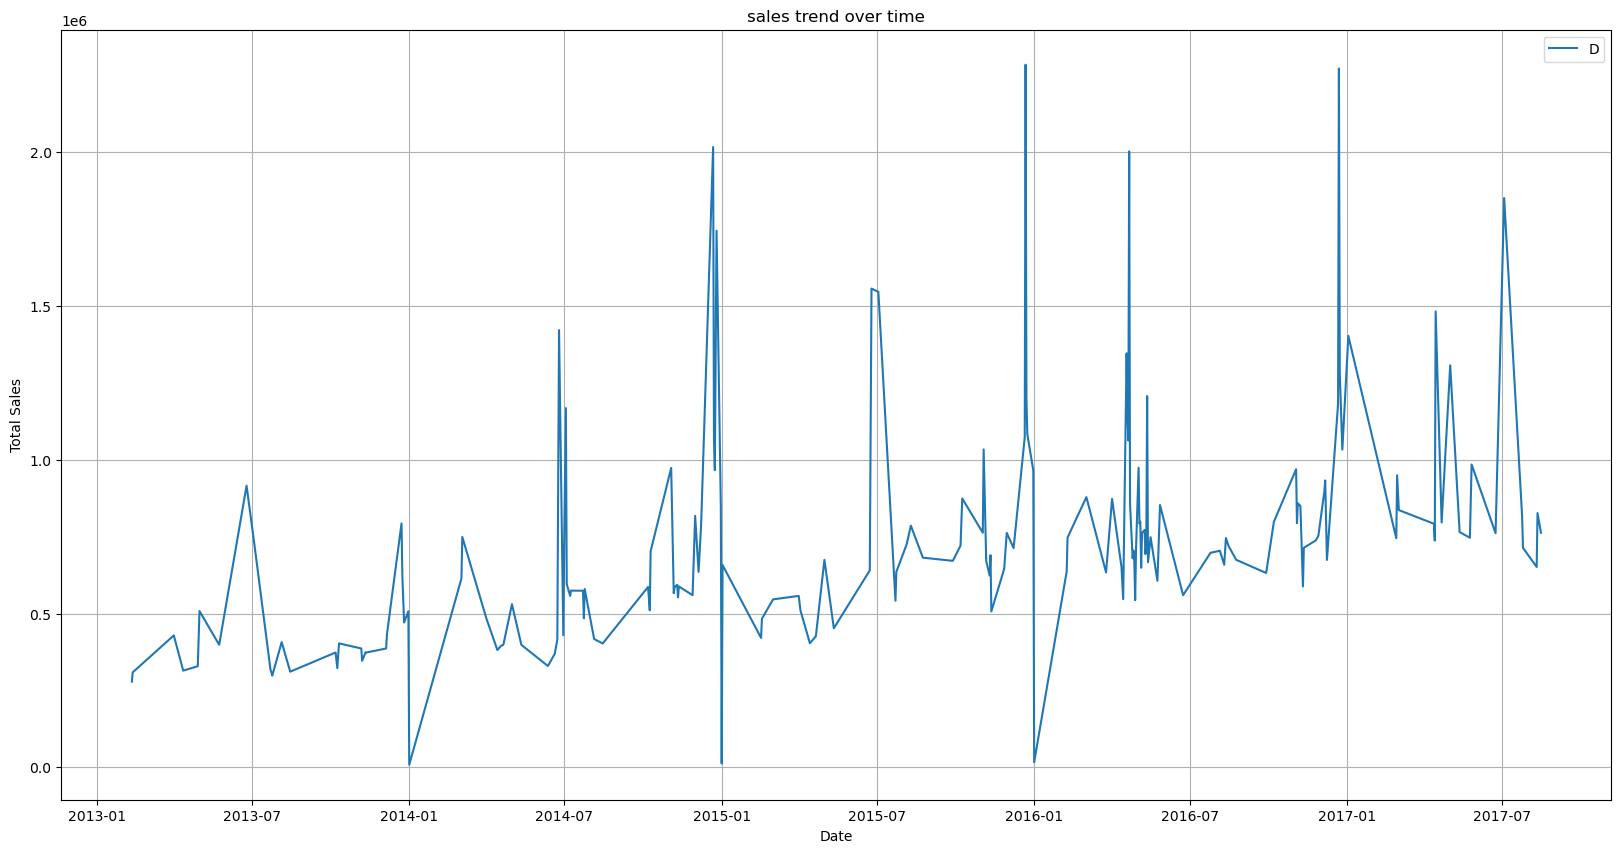

In [57]:
# Visualization of sales trend over time

Daily_sales = df_train.groupby('date')['sales'].sum()

plt.figure(figsize = (20,10))
plt.plot(Daily_sales)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('sales trend over time')
plt.grid()
plt.show()

###### It shows that at the year end the sales are very high around the month of November and December

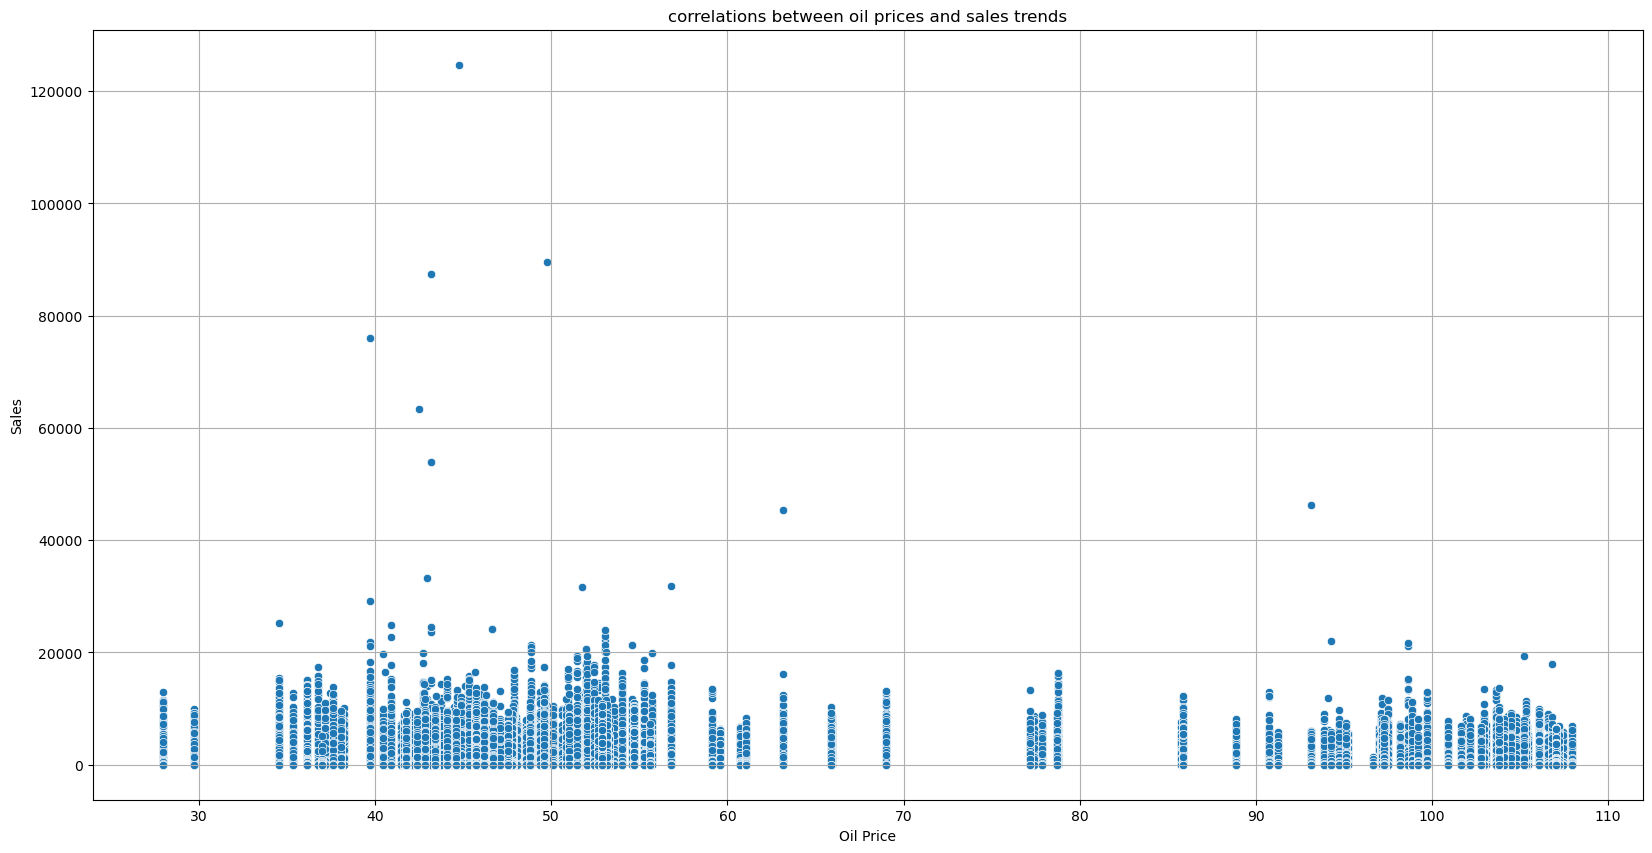

In [59]:
#Check correlations between oil prices and sales trends.

plt.figure(figsize = (20,10))
sns.scatterplot(x =df_train['dcoilwtico'] , y = df_train['sales'] )
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.title('correlations between oil prices and sales trends')
plt.grid()
plt.show()

In [63]:
corr = df_train[['dcoilwtico', 'sales']].corr()
print(corr)

            dcoilwtico    sales
dcoilwtico     1.00000 -0.07273
sales         -0.07273  1.00000


###### The above graph shows litrally "no correlation" or slightly negative correlation between 'oil price' and 'sales' column

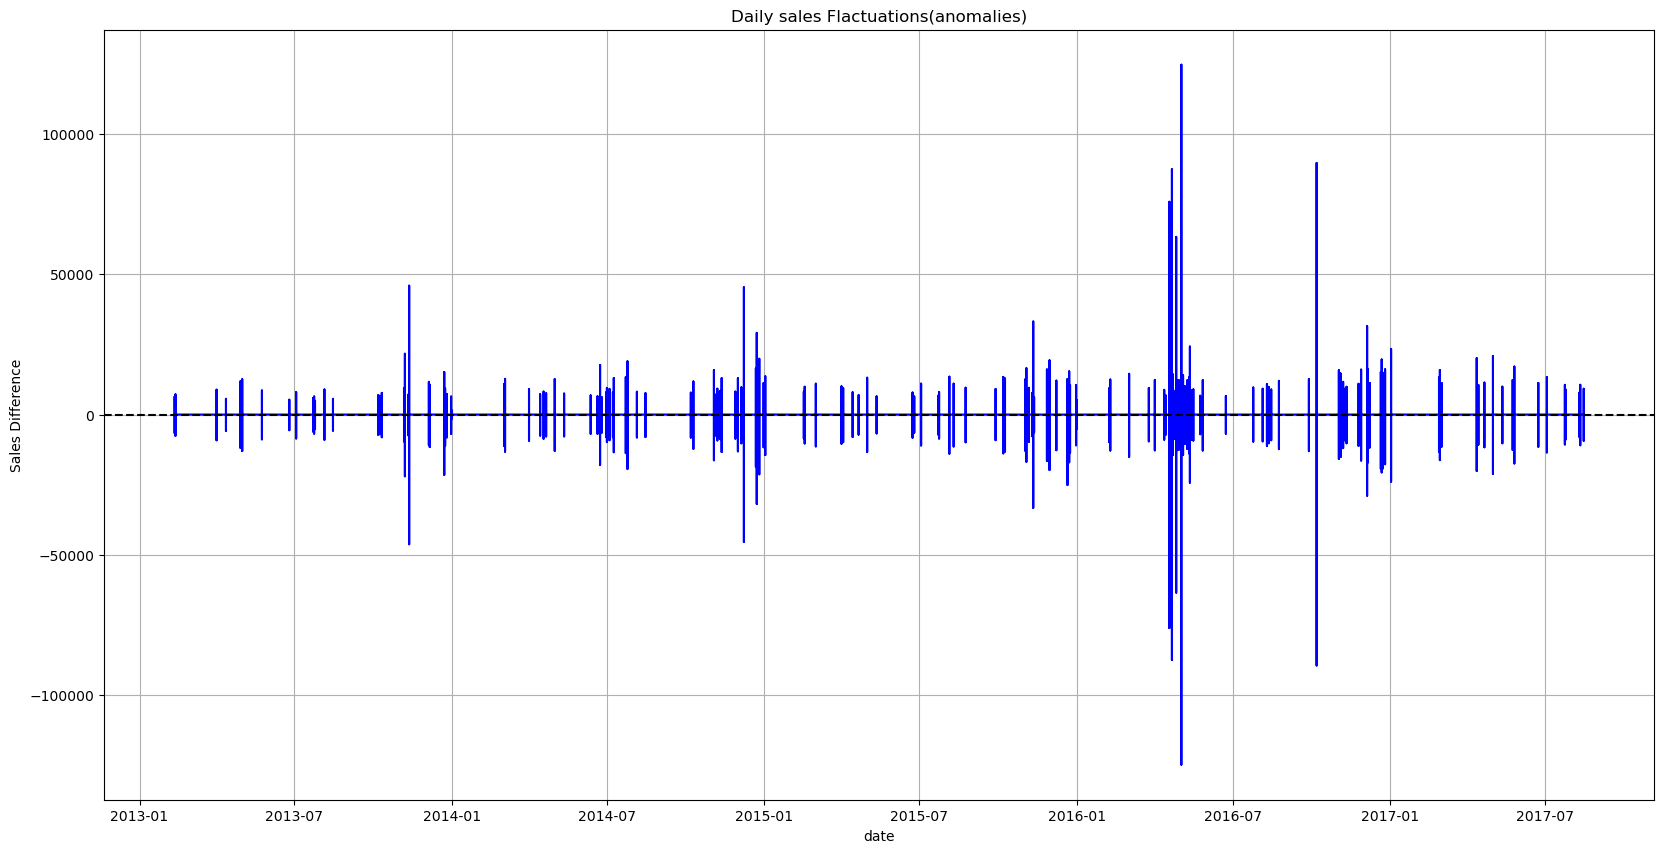

In [65]:
#Identify anomalies in the data.
df_train['sales_diff'] =  df_train['sales'].diff()

plt.figure(figsize = (20,10))
plt.plot(df_train['date'], df_train['sales_diff'], color = 'blue')
plt.axhline(y =0, color ='black', linestyle = '--')
plt.xlabel('date')
plt.ylabel('Sales Difference')
plt.title('Daily sales Flactuations(anomalies)')
plt.grid()
plt.show()

###### There are high flactuations between 01-2016 and 07-2016

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351054 entries, 0 to 351053
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   351054 non-null  int64         
 1   date                 351054 non-null  datetime64[ns]
 2   store_nbr            351054 non-null  int64         
 3   family               351054 non-null  object        
 4   sales                351054 non-null  float64       
 5   onpromotion          351054 non-null  int64         
 6   dcoilwtico           351054 non-null  float64       
 7   type_x               351054 non-null  object        
 8   locale               351054 non-null  object        
 9   locale_name          351054 non-null  object        
 10  description          351054 non-null  object        
 11  transferred          351054 non-null  object        
 12  city                 351054 non-null  object        
 13  state         

###### I found some null values in 'laged_sale_30 ', 'laged_sale_7', 'rollstd' columns after Feature Engineering & EDA, so the dataset was large and there were very small amount of null values so I decided to drop them.

In [67]:
df_train = df_train.dropna()

###### Part 2: Model Selection, Forecasting, and Evaluation (Day 2)
 1. Model Training
 Train at least five different time series forecasting models:
 - Baseline Model (Naïve Forecasting) 
 - Assume future sales = previous sales.
 - ARIMA (AutoRegressive Integrated Moving Average) - A traditional time series model.
 - Random Forest Regressor - Tree-based model to capture non-linear relationships.
 - XGBoost or LightGBM - Gradient boosting models to improve accuracy.
 - LSTM (Long Short-Term Memory Neural Network) - A deep learning-based forecasting model.
 Bonus Challenge: If comfortable, implement a Prophet model for handling seasonality.

Random Forest Regressor - Tree-based model to capture non-linear relationships.

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [73]:
# Splitting input and output coulms
X = df_train.drop(columns = 'sales')
y = df_train['sales']

In [75]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [77]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [95]:
rf.fit(X_train, y_train)

TypeError: Cannot cast DatetimeArray to dtype float32

In [81]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [83]:
from xgboost import XBGRegressor

ImportError: cannot import name 'XBGRegressor' from 'xgboost' (C:\Users\krish\anaconda3\Lib\site-packages\xgboost\__init__.py)

In [84]:
from statsmodels.tsa.arima.model import ARIMA


In [90]:
model = ARIMA(df_train['sales'], order = (1,1,1))
model_fit = model.fit()

C:\Users\krish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [92]:
forecast = model_fit.forecast(steps =15)
print(forecast)

297594    480.969504
297595    505.989402
297596    507.335717
297597    507.408162
297598    507.412060
297599    507.412270
297600    507.412281
297601    507.412282
297602    507.412282
297603    507.412282
297604    507.412282
297605    507.412282
297606    507.412282
297607    507.412282
297608    507.412282
Name: predicted_mean, dtype: float64


C:\Users\krish\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [94]:
from sklearn.metrics import mean_squared_error, r2_score